Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)

Plot bar charts showing impact of employee salaries on retention

Plot bar charts showing corelation between department and employee retention

Now build logistic regression model using variables that were narrowed down in step 1
Measure the accuracy of the model

In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("datasets/HR_comma_sep.csv")
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


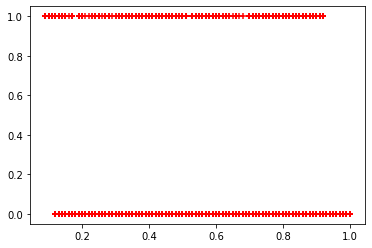

In [3]:
plt.scatter(df.satisfaction_level,df.left,marker="+",color="r")

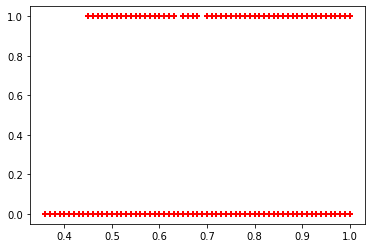

In [4]:
plt.scatter(df.last_evaluation,df.left,marker="+",color="r")

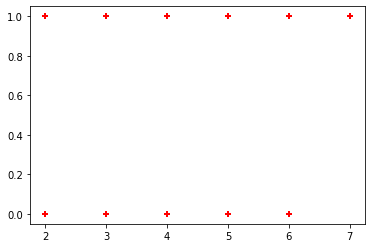

In [5]:
plt.scatter(df.number_project,df.left,marker="+",color="r")

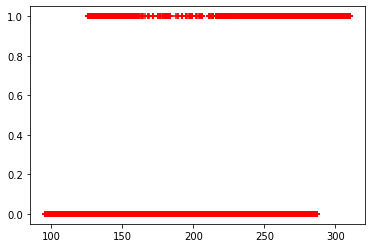

In [6]:
plt.scatter(df.average_montly_hours,df.left,marker="+",color="r")

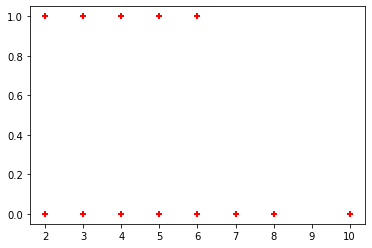

In [7]:
plt.scatter(df.time_spend_company,df.left,marker="+",color="r")

In [8]:
### from above alll graphs we conclude that we can apply logistic regression 

In [21]:
df.groupby("left").mean()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


# from abopve we find our dominating colums :

1.satisfaction_level 
2.average_mmonthly_hour
3.promotion_last_5years

In [24]:
pd.crosstab(df.salary,df.left)

left,0,1
salary,,
high,1155,82
low,5144,2172
medium,5129,1317


<AxesSubplot:xlabel='salary'>

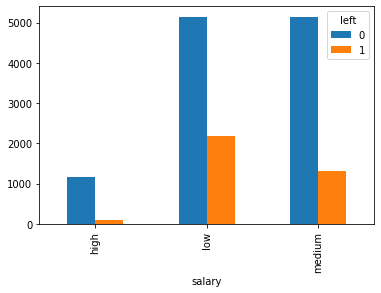

In [66]:
pd.crosstab(df.salary,df.left).plot(kind="bar")

In [67]:
new_df=df[["satisfaction_level","average_montly_hours","promotion_last_5years","salary"]]
new_df

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low
...,...,...,...,...
14994,0.40,151,0,low
14995,0.37,160,0,low
14996,0.37,143,0,low
14997,0.11,280,0,low


In [68]:
##converting salary type into dummies

In [69]:
dummies=pd.get_dummies(df["salary"])
dummies

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [96]:
new_df_dummies=pd.concat([new_df,dummies],axis="columns")

In [97]:
(new_df_dummies)

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,high,low,medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0
...,...,...,...,...,...,...,...
14994,0.40,151,0,low,0,1,0
14995,0.37,160,0,low,0,1,0
14996,0.37,143,0,low,0,1,0
14997,0.11,280,0,low,0,1,0


In [98]:
new_df_dummies.drop('salary',axis="columns",inplace=True)

In [99]:
new_df_dummies

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0
...,...,...,...,...,...,...
14994,0.40,151,0,0,1,0
14995,0.37,160,0,0,1,0
14996,0.37,143,0,0,1,0
14997,0.11,280,0,0,1,0


In [100]:
x=new_df_dummies
y=df.left

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [103]:
x_train

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
4363,0.85,201,0,0,1,0
13914,0.59,214,0,0,1,0
895,0.10,294,0,0,0,1
5287,0.71,194,0,0,1,0
7382,0.54,253,0,1,0,0
...,...,...,...,...,...,...
3012,0.73,167,0,0,1,0
6102,0.96,234,0,0,0,1
5091,0.58,225,0,1,0,0
13119,0.47,152,0,0,0,1


In [104]:
x_test

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
8510,0.72,230,0,0,1,0
13425,0.50,264,1,1,0,0
1446,0.37,157,0,0,1,0
2237,0.74,176,0,0,1,0
3961,0.93,201,0,0,0,1
...,...,...,...,...,...,...
8433,0.54,245,0,0,1,0
5023,0.98,145,0,0,1,0
8661,0.49,259,0,0,1,0
14382,0.41,160,1,0,1,0


In [105]:
y_test

8510     0
13425    0
1446     1
2237     0
3961     0
        ..
8433     0
5023     0
8661     0
14382    1
12856    0
Name: left, Length: 3000, dtype: int64

In [106]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()


In [107]:
model.fit(x_train,y_train)

LogisticRegression()

In [110]:
(model.predict(x_test))

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [111]:
y_test

8510     0
13425    0
1446     1
2237     0
3961     0
        ..
8433     0
5023     0
8661     0
14382    1
12856    0
Name: left, Length: 3000, dtype: int64

In [115]:
model.score(x_test,y_test)

0.783